# Ejercicio 1

## a.

En primer lugar necesitamos importar las dependencias necesarias, las cuales son

In [2]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [3]:
poke = []
factory = PokemonFactory("pokemon.json")
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
colors = ['red', 'grey', 'yellow', 'blue']     

In [4]:
#TODO:
#image_paths = []
#for pokeball_type in pokeballs:
    #image_paths.append(f"img/{pokeball_type}.png")

Luego debemos instanciar las clases y crear los datos

In [5]:
with open("pokemon.json", "r") as c:
            pokemon_db = json.load(c)
            for pokemon in pokemon_db:
                poke.append(factory.create(pokemon, 100, StatusEffect.NONE, 1))

En el siguiente codigo se realiza, con todas las pokebolas,  100 intentos de atrapar a todos los pokemones y se muestra el grafico de los porsentajes de atrapadas en funcion del tupo de pokebola.

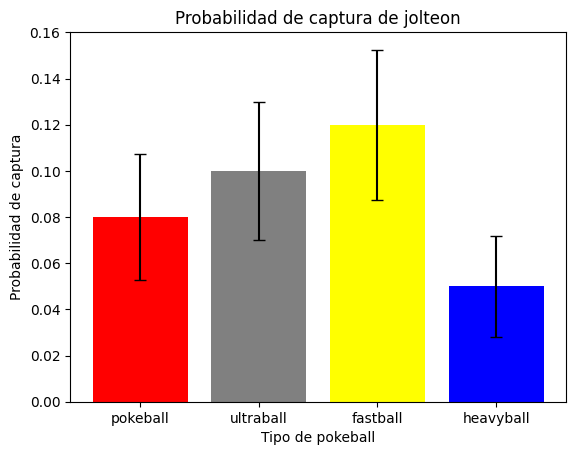

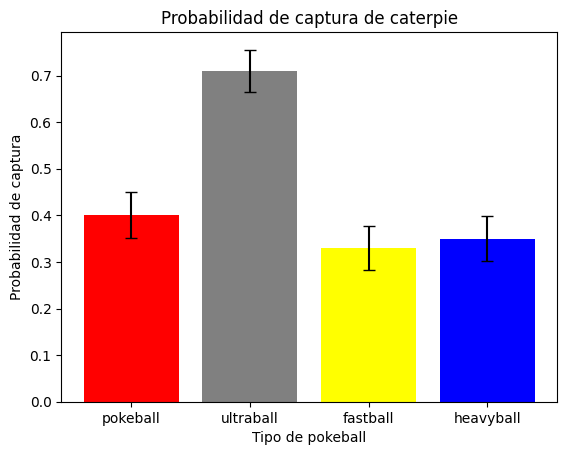

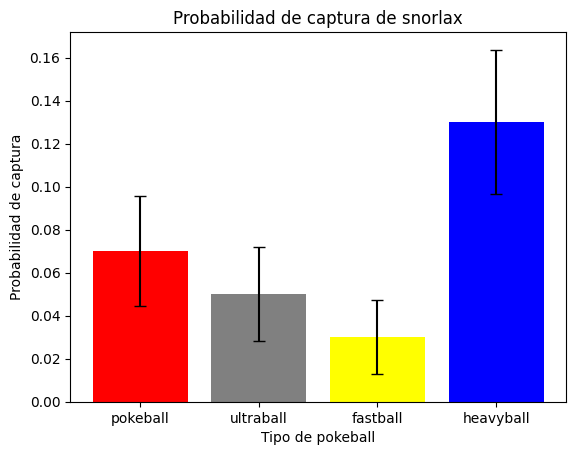

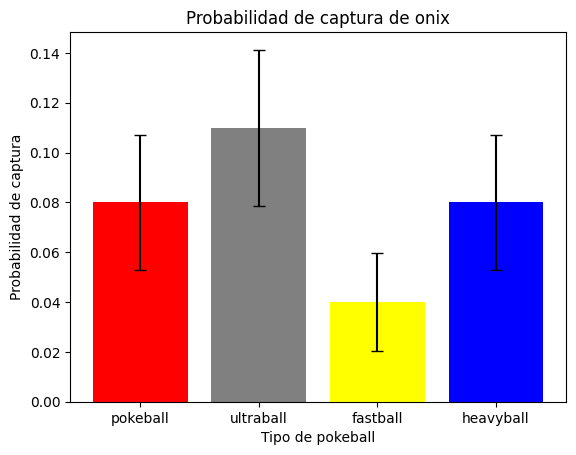

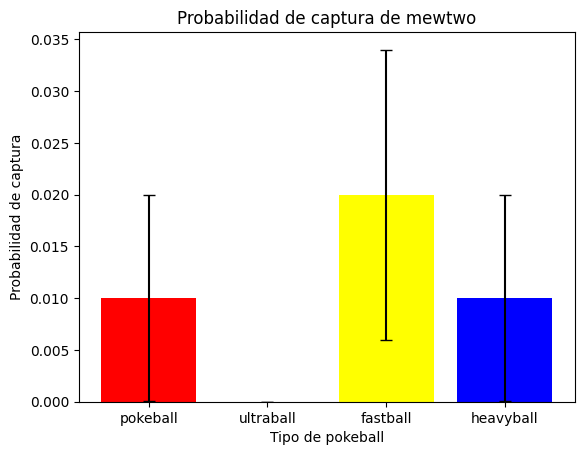

In [6]:
for poke_instance in poke:
    capture_rates = []
    std_errors = []
    for pokeball_type in pokeballs:
        capture_attempts = []
        for i in range(100):
            capture_attempts.append(attempt_catch(poke_instance, pokeball_type)[0])

        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
        
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'pokeball_type': pokeballs, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.bar(data['pokeball_type'], data['capture_rate'], yerr=std_errors, capsize=4, color=colors)
    plt.title(f'Probabilidad de captura de {poke_instance.name}')
    plt.xlabel('Tipo de pokeball')
    plt.ylabel('Probabilidad de captura')
    plt.show()

## b.

Efectivamente, dadas ciertas propiedades intrinsecas de cada pokemon la propiedad de atraparlos se ve modificada. Por ejemplo, Jolteon tiene 130 en su estadistica de velocidad; por lo que observando el grafico, la probabilidad de atraparlo con la fastball en la mayoria de casos sera razonablemente superior comparado a las otras pokeballs. Esto se debe a que la pokebola fastball incrementa la posibilidad de atrapar a partir de 100 de estadistica.